In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import datetime as dt
# pd.set_option(max_column)

In [3]:
df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['latitude'] = df['latitude'].astype(str)
df['longitude'] = df['longitude'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df.dtypes

id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                  object
longitude                                 object
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [7]:
df.shape

(48895, 16)

# Missing Data Handling

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Drop rows with any null values
df.dropna(inplace=True)
df.isna().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
df.describe()

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,2018-10-04 07:23:47.072975872,1.373229,5.166611,114.886299
min,0.000000,1.000000,1.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,2018-07-09 00:00:00,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,2019-05-19 00:00:00,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2019-06-23 00:00:00,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,196.994756,17.389026,48.182900,NaN,1.680328,26.302954,129.529950


# Outlier Detection

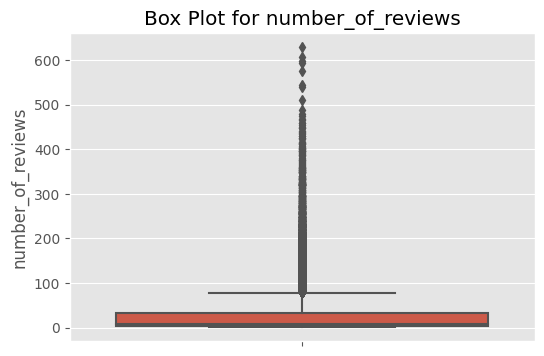

In [12]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='number_of_reviews')
plt.title('Box Plot for number_of_reviews')
plt.ylabel('number_of_reviews')
plt.show()

In [13]:
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['number_of_reviews'] < lower_bound) | (df['number_of_reviews'] > upper_bound)]
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39


In [14]:
df = df[(df['number_of_reviews'] > lower_bound) & (df['number_of_reviews'] < upper_bound)]


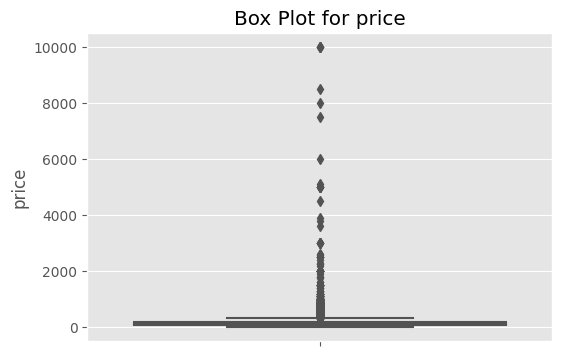

In [15]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='price')
plt.title('Box Plot for price')
plt.ylabel('price')
plt.show()

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.9953,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.7254,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216


In [17]:
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

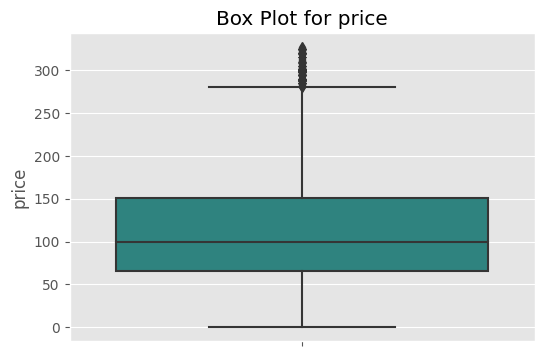

In [18]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='price', palette='viridis')
plt.title('Box Plot for price')
plt.ylabel('price')
plt.show()

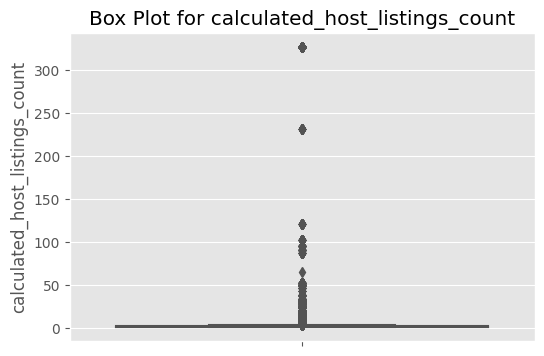

In [19]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='calculated_host_listings_count')
plt.title('Box Plot for calculated_host_listings_count')
plt.ylabel('calculated_host_listings_count')
plt.show()

In [20]:
Q1 = df['calculated_host_listings_count'].quantile(0.25)
Q3 = df['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['calculated_host_listings_count'] < lower_bound) | (df['calculated_host_listings_count'] > upper_bound)]
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
80,18764,Cozy 2 BR in Williamsburg,72014,Lulú,Brooklyn,Williamsburg,40.71154,-73.96112,Private room,145,3,61,2019-04-22,0.54,4,238
92,20755,"Large Parlor Room, Landmark Home 1 block to PRATT",51038,Erica,Brooklyn,Clinton Hill,40.68634,-73.966,Private room,98,7,16,2019-05-31,0.20,6,185


In [21]:
df = df[(df['calculated_host_listings_count'] > lower_bound) & (df['calculated_host_listings_count'] < upper_bound)]

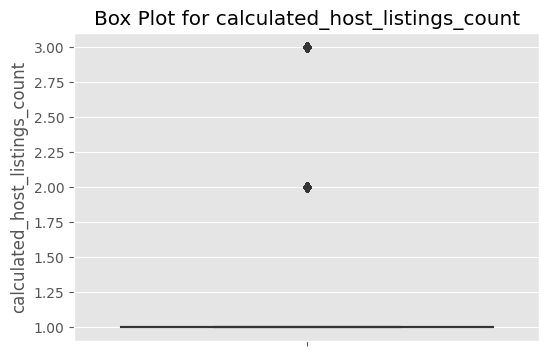

In [22]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='calculated_host_listings_count', palette='viridis')
plt.title('Box Plot for calculated_host_listings_count')
plt.ylabel('calculated_host_listings_count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


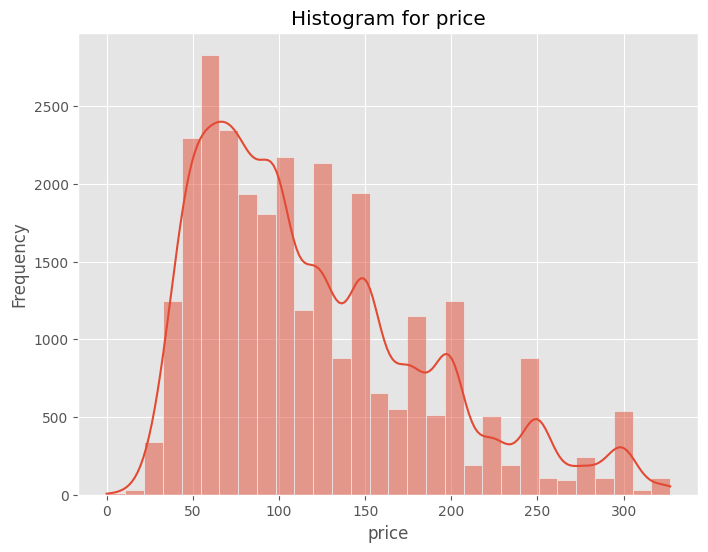

In [23]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Histogram for price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [24]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 0.932562
Kurtosis: 0.249717


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


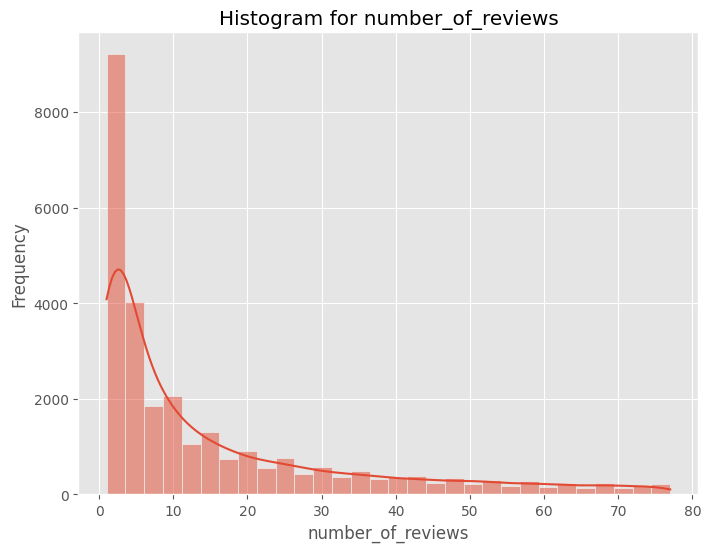

In [25]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='number_of_reviews', bins=30, kde=True)
plt.title('Histogram for number_of_reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('Frequency')
plt.show()

In [26]:
print("Skewness: %f" % df['number_of_reviews'].skew())
print("Kurtosis: %f" % df['number_of_reviews'].kurt())

Skewness: 1.578492
Kurtosis: 1.664988
